<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Frequentist Statistics**

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

##Measure of Central Tendency

In [4]:
x= st.skewnorm.rvs(10,size=1000)

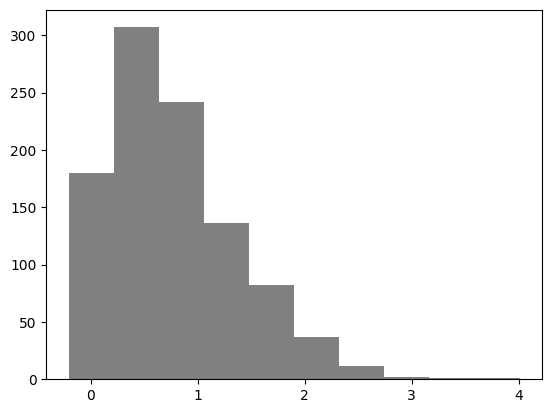

In [5]:
fig,ax = plt.subplots()
_ = ax.hist(x,color='grey')

In [6]:
xbar = x.mean()

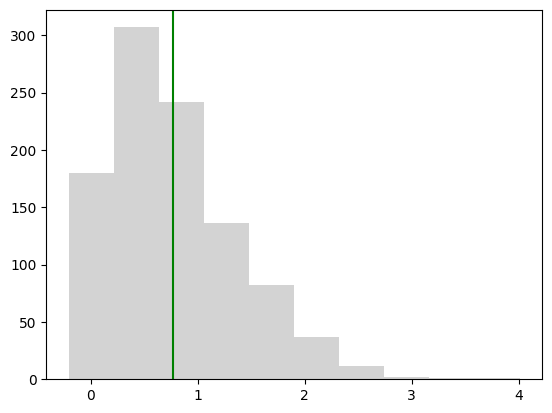

In [7]:
fig,ax = plt.subplots()
plt.axvline(xbar,color='green')
_ = ax.hist(x,color='lightgray')

In [8]:
med = np.median(x)

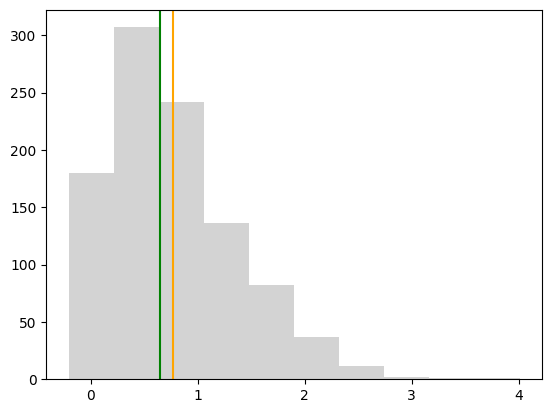

In [9]:
fig,ax = plt.subplots()
plt.axvline(med,color='green')
plt.axvline(xbar,color='orange')
_ = ax.hist(x,color='lightgray')

##Measure of Dispersion

In [10]:
vr = np.var(x)

In [11]:
sd = np.std(x)

In [12]:
sd

0.5960572059628305

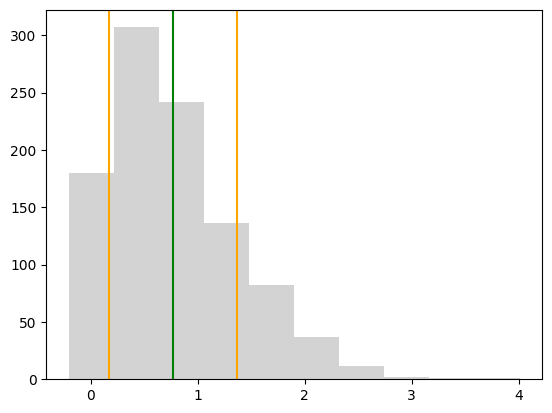

In [13]:
fig,ax = plt.subplots()
plt.axvline(xbar,color='green')
plt.axvline(xbar + sd,color='orange')
plt.axvline(xbar - sd,color='orange')
_ = ax.hist(x,color='lightgray')

##Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [14]:
sd / ((x.size )**(1/2))

0.018848983865986414

In [15]:
st.sem(x,ddof=0)

0.018848983865986414

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

##Guassian Distribution / Normal Distribution

In [16]:
x = np.random.normal(size=10000)

In [17]:
sns.set_style('ticks')

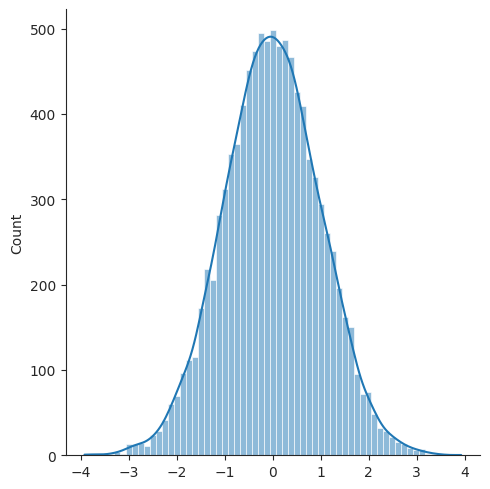

In [18]:
_ = sns.displot(x, kde=True)

In [19]:
x.std()

1.0039756140435032

##**Z-Scores**

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [20]:
(85-60)/10

2.5

In [21]:
x_i = 85
mu = 60
sigma  =10

In [22]:
x = np.random.normal(mu,sigma,size=10000)

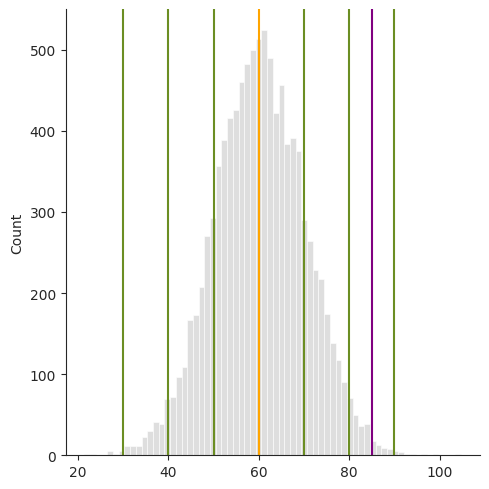

In [25]:
sns.displot(x,color='lightgray')

ax.set_xlim(0,100)
plt.axvline(mu, color='orange')
for v in [-3,-2,-1,1,2,3]:
    plt.axvline(mu+ v*sigma, color='olivedrab')

_ = plt.axvline(x_i,color='purple')

Your z-score is 2.5 standard deviations

In [26]:
## in the whole class

z = (x_i - np.mean(x))/np.std(x)
z

2.476625942263925

In [31]:
len((np.where(x>85)[0]))

54

In [32]:
100*54/10000

0.54

In [33]:
np.percentile(x,99)

83.3617286801891

In contrast, if the mean score is 90 and the std dev is 2

In [34]:
mu = 90
sigma = 2

In [35]:
y = np.random.normal(mu,sigma,size=10000)

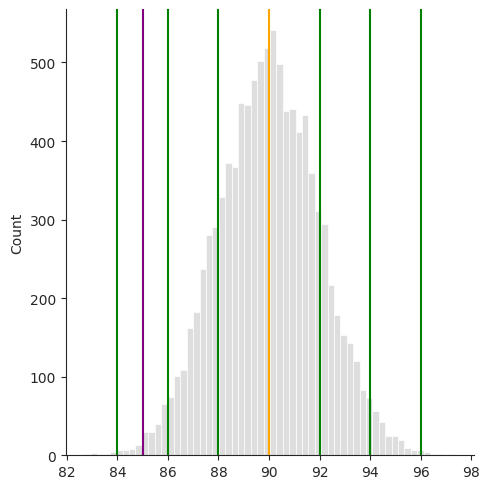

In [36]:
sns.displot(y,color='lightgray')
plt.axvline(mu, color='orange')

for v in [-3,-2,-1,1,2,3]:
  plt.axvline(mu + v*sigma,color='green')

_ = plt.axvline(x_i,color='purple')

In [37]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.506180896352216

Now the z-score is 2.5 std dev below the mean

In [38]:
len(np.where(y>85)[0])

9948

In [39]:
100*9948/10000

99.48

In [41]:
np.percentile(y,1)

85.3959716097412

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**.

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.